# TP02-suite: Optimizing hyperparameters (Keras)  

## 01-Load and preprocess the Cifar-10 dataset by normalizing the data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, relu, softmax

2024-03-08 00:23:41.774980: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 00:23:42.088382: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 00:23:42.088490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 00:23:42.142060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 00:23:42.259850: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 00:23:42.261381: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


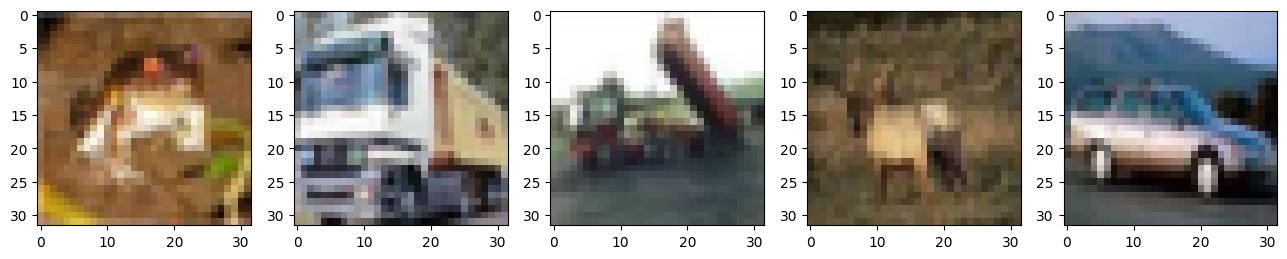

In [4]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = x_train[i]
    axarr[i].imshow(img)
plt.show()

In [5]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [6]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (50000, 3072)
y_train: (50000, 1)
x_test:  (10000, 3072)
y_test:  (10000, 1)


In [7]:
x_train=x_train/255
x_test=x_test/255

## 02- Split the train set into training and validation sets, with a 20% validation set. 

In [8]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_cv: ' + str(x_cv.shape))
print('y_cv: ' + str(y_cv.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (40000, 3072)
y_train: (40000, 1)
x_cv: (10000, 3072)
y_cv: (10000, 1)
x_test:  (10000, 3072)
y_test:  (10000, 1)


## 03- Model Architecture:
### 01 input layer, 02 hidden layers (128, 64 neurons) and one fully connected layer.
### the RELU activation function for hidden layers and the softmax for the fully connected layer.
### cross-entropy loss function.

In [10]:
tf.random.set_seed(1234) 
def mlp_model():
    mlp_model = keras.Sequential([
    tf.keras.Input(shape=(3072,)),    #specify input shape
    Dense(128, activation='relu', name='hidden_layer_1'),
    Dense(64, activation='relu', name='hidden_layer_2'),
    Dense(10, activation='softmax', name='output_layer'),
])
    return mlp_model

## 04-Mini-batch SGD :  batch size 128, a learning rate of 0.01, for 50 epochs.

In [11]:
import time

timing = {}
start_time = time.time()
mini_sgd_model=mlp_model()
mini_sgd_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

history_mini = mini_sgd_model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_cv, y_cv))  
end_time=time.time()
timing['mini_sgd_model'] = end_time-start_time

2024-03-08 00:23:57.769593: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/50


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 5s 13ms/step - loss: 2.0623 - accuracy: 0.2613 - val_loss: 1.9353 - val_accuracy: 0.3061
Epoch 2/50
313/313 [==============================] - 4s 14ms/step - loss: 1.8755 - accuracy: 0.3366 - val_loss: 1.8519 - val_accuracy: 0.3413
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 1.8063 - accuracy: 0.3645 - val_loss: 1.7952 - val_accuracy: 0.3613
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7616 - accuracy: 0.3820 - val_loss: 1.8091 - val_accuracy: 0.3585
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 1.7238 - accuracy: 0.3961 - val_loss: 1.8137 - val_accuracy: 0.3637
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6969 - accuracy: 0.4055 - val_loss: 1.7162 - val_accuracy: 0.3713
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6702 - accuracy: 0.4137 - val_loss: 1.6854 - val_accuracy: 0.3969
Epoch 8/50
313

## Plot the learning curves on the train and validation data.

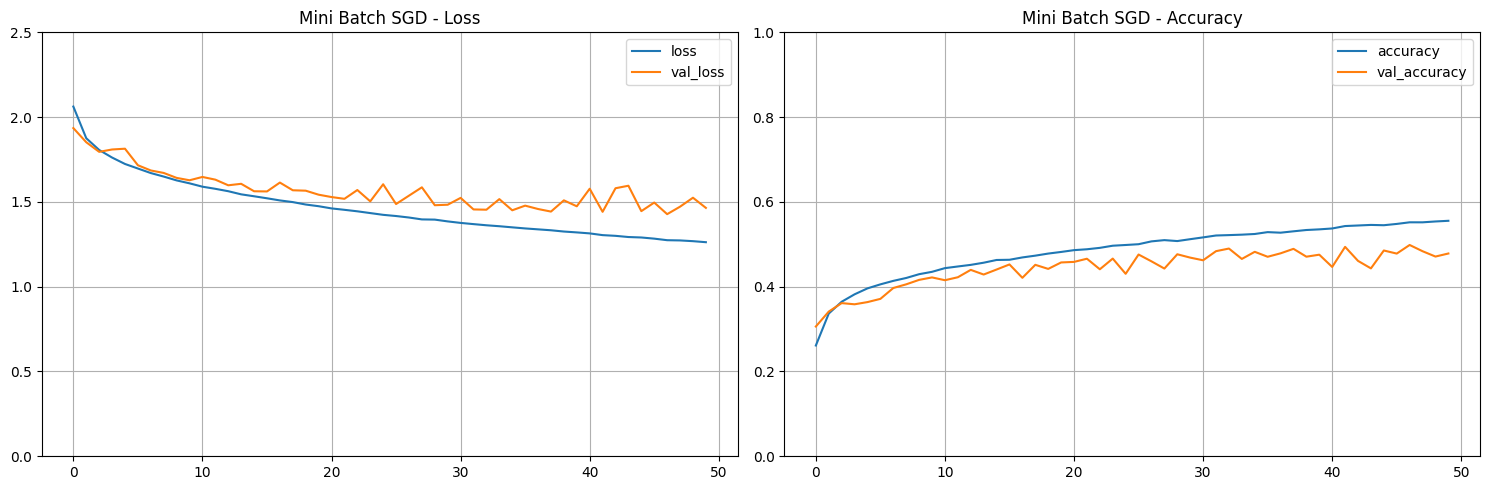

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(history_mini.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.title('Mini Batch SGD - Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(history_mini.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title('Mini Batch SGD - Accuracy')

plt.tight_layout()  
plt.show()  

## 05-Add L2 norm regularization to the second fully connected layer, and plot the learning curves on the train and validation data.

In [13]:
import time

start_time = time.time()
mini_sgd_l2_model=keras.Sequential([
    tf.keras.Input(shape=(3072,)),    
    Dense(128, activation='relu', name='hidden_layer_1'),
    Dense(64, activation='relu', name='hidden_layer_2',kernel_regularizer=keras.regularizers.l2(0.01)), 
    Dense(10, activation='softmax', name='output_layer'),
])
mini_sgd_l2_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

history_mini_l2 = mini_sgd_l2_model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_cv, y_cv))  
end_time=time.time()
timing['mini_sgd_l2_model'] = end_time-start_time

Epoch 1/50


2024-03-08 00:25:58.698682: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 3s 8ms/step - loss: 2.8635 - accuracy: 0.2522 - val_loss: 2.7047 - val_accuracy: 0.3024
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 2.5991 - accuracy: 0.3331 - val_loss: 2.5274 - val_accuracy: 0.3357
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 2.4559 - accuracy: 0.3564 - val_loss: 2.4022 - val_accuracy: 0.3631
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 2.3462 - accuracy: 0.3732 - val_loss: 2.3428 - val_accuracy: 0.3604
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 2.2524 - accuracy: 0.3844 - val_loss: 2.3082 - val_accuracy: 0.3569
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 2.1748 - accuracy: 0.3967 - val_loss: 2.1540 - val_accuracy: 0.3855
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 2.1038 - accuracy: 0.4059 - val_loss: 2.0897 - val_accuracy: 0.3910
Epoch 8/50
313/31

## Plot the learning curves on the train and validation data.

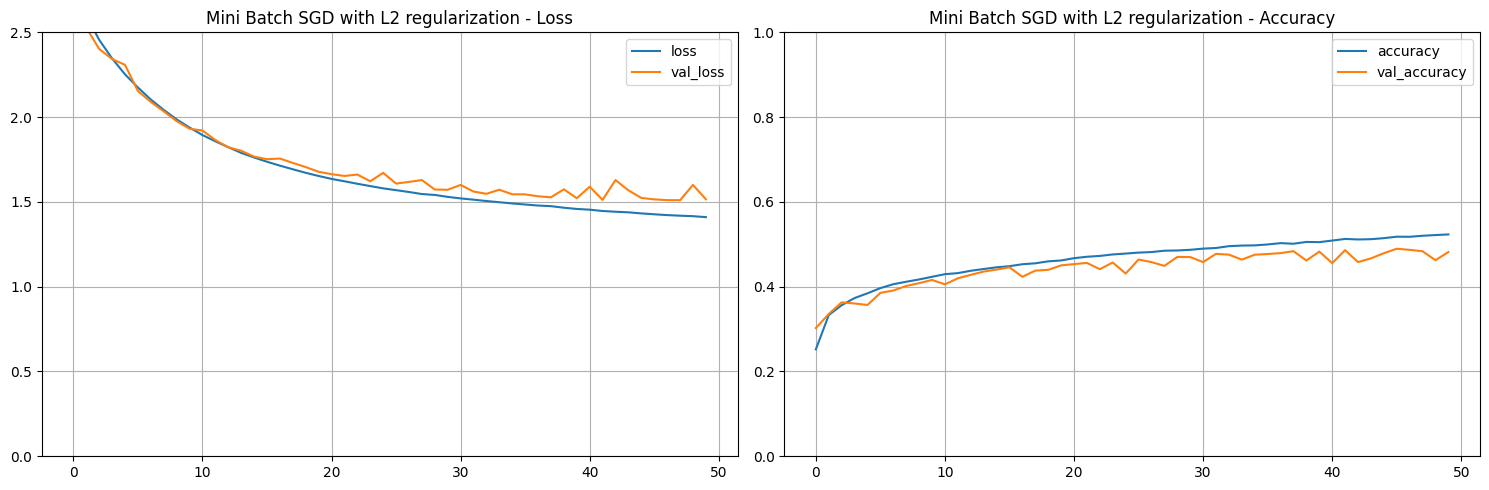

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(history_mini_l2.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.title('Mini Batch SGD with L2 regularization - Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(history_mini_l2.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title('Mini Batch SGD with L2 regularization - Accuracy')

plt.tight_layout()  
plt.show()  

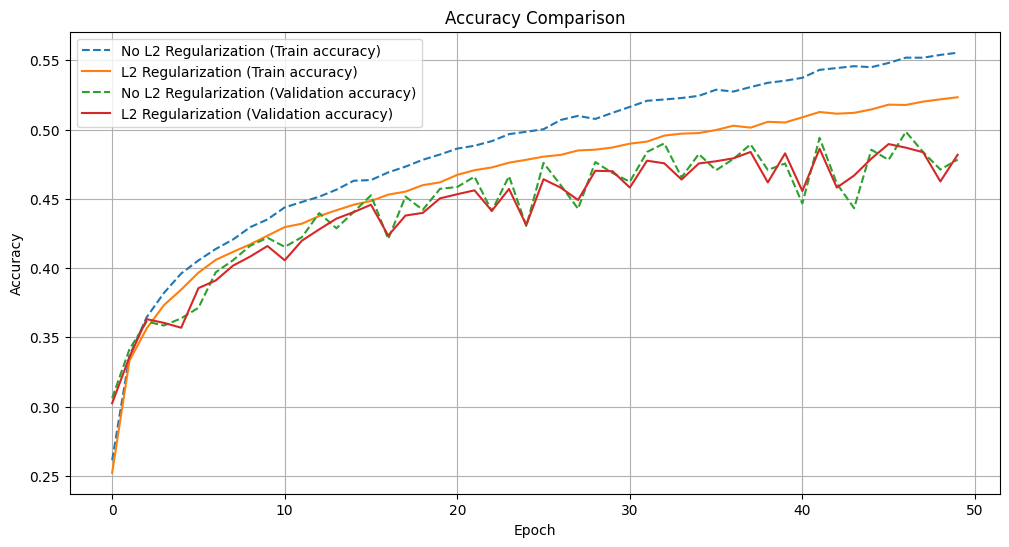

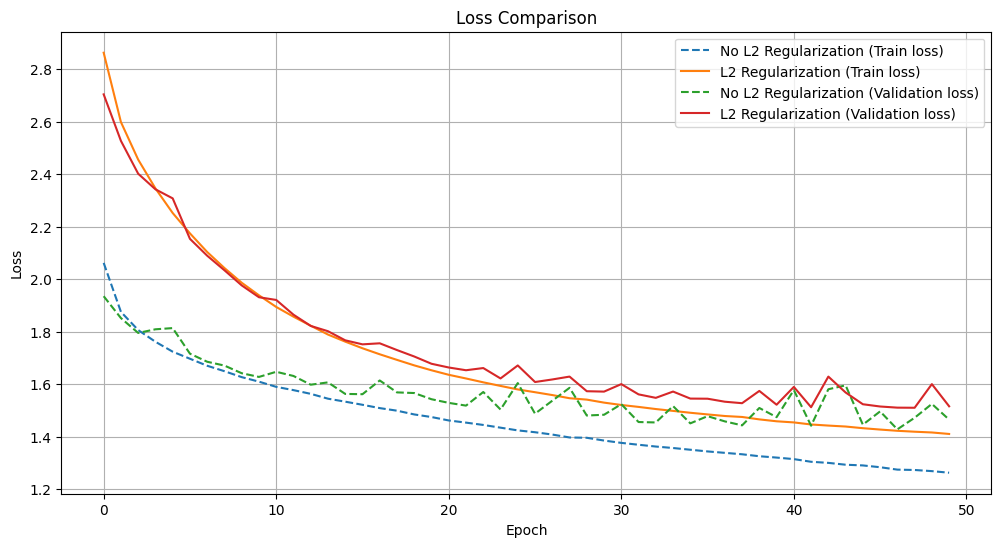

In [34]:
import matplotlib.pyplot as plt

def plot_comparison(history_no_l2, history_l2, metric='accuracy'):
    plt.figure(figsize=(12, 6))

    # Plot Training
    plt.plot(history_no_l2.history[metric], label=f'No L2 Regularization (Train {metric})', linestyle='dashed')
    plt.plot(history_l2.history[metric], label=f'L2 Regularization (Train {metric})', linestyle='solid')

    # Plot Validation
    plt.plot(history_no_l2.history[f'val_{metric}'], label=f'No L2 Regularization (Validation {metric})', linestyle='dashed')
    plt.plot(history_l2.history[f'val_{metric}'], label=f'L2 Regularization (Validation {metric})', linestyle='solid')

    plt.title(f'{metric.capitalize()} Comparison')
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()


plot_comparison(history_mini, history_mini_l2, metric='accuracy')
plot_comparison(history_mini, history_mini_l2, metric='loss')


### 06-Add a dropout layer with rates of 0.2, 0.3, and 0.5 to the second fully connected layer, and compare the results obtained.

In [16]:
dropout_rates=[0.2,0.3,0.5]
results = {}
for rate in dropout_rates:
    mini_sgd_dropout=keras.Sequential([
        tf.keras.Input(shape=(3072,)),    
        Dense(128, activation='relu', name='hidden_layer_1'),
        Dense(64, activation='relu', name='hidden_layer_2',kernel_regularizer=keras.regularizers.l2(0.01)), 
        keras.layers.Dropout(rate),
        Dense(10, activation='softmax', name='output_layer'),
    ])
    mini_sgd_dropout.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        metrics=["accuracy"]
    )

    history_dropout = mini_sgd_dropout.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_cv, y_cv))  


    results[f'mini_sgd_dropout_{rate}'] = {'history': history_dropout}

Epoch 1/50


2024-03-08 00:27:54.533118: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 3s 9ms/step - loss: 2.9041 - accuracy: 0.2320 - val_loss: 2.7404 - val_accuracy: 0.2786
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 2.6582 - accuracy: 0.3015 - val_loss: 2.5460 - val_accuracy: 0.3346
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 2.5168 - accuracy: 0.3287 - val_loss: 2.4242 - val_accuracy: 0.3541
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 2.4046 - accuracy: 0.3431 - val_loss: 2.3532 - val_accuracy: 0.3545
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 2.3100 - accuracy: 0.3550 - val_loss: 2.2875 - val_accuracy: 0.3644
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 2.2346 - accuracy: 0.3657 - val_loss: 2.1651 - val_accuracy: 0.3819
Epoch 7/50
313/313 [==============================] - 2s 8ms/step - loss: 2.1659 - accuracy: 0.3715 - val_loss: 2.1071 - val_accuracy: 0.3882
Epoch 8/50
313/31

2024-03-08 00:29:54.262326: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step - loss: 2.9279 - accuracy: 0.2154 - val_loss: 2.7461 - val_accuracy: 0.2926
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 2.6847 - accuracy: 0.2836 - val_loss: 2.5601 - val_accuracy: 0.3373
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 2.5412 - accuracy: 0.3149 - val_loss: 2.4319 - val_accuracy: 0.3592
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 2.4320 - accuracy: 0.3303 - val_loss: 2.3411 - val_accuracy: 0.3618
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 2.3384 - accuracy: 0.3431 - val_loss: 2.3014 - val_accuracy: 0.3681
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 2.2600 - accuracy: 0.3574 - val_loss: 2.1818 - val_accuracy: 0.3822
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 2.1906 - accuracy: 0.3642 - val_loss: 2.1179 - val_accuracy: 0.3801
Epoch 8/50
313/31

2024-03-08 00:31:53.559800: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step - loss: 2.9538 - accuracy: 0.1985 - val_loss: 2.7717 - val_accuracy: 0.2964
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 2.7441 - accuracy: 0.2542 - val_loss: 2.6064 - val_accuracy: 0.3187
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 2.6107 - accuracy: 0.2783 - val_loss: 2.4956 - val_accuracy: 0.3336
Epoch 4/50
313/313 [==============================] - 3s 8ms/step - loss: 2.5033 - accuracy: 0.2948 - val_loss: 2.4148 - val_accuracy: 0.3331
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 2.4129 - accuracy: 0.3083 - val_loss: 2.3374 - val_accuracy: 0.3446
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 2.3337 - accuracy: 0.3183 - val_loss: 2.2204 - val_accuracy: 0.3617
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 2.2650 - accuracy: 0.3271 - val_loss: 2.1582 - val_accuracy: 0.3672
Epoch 8/50
313/31

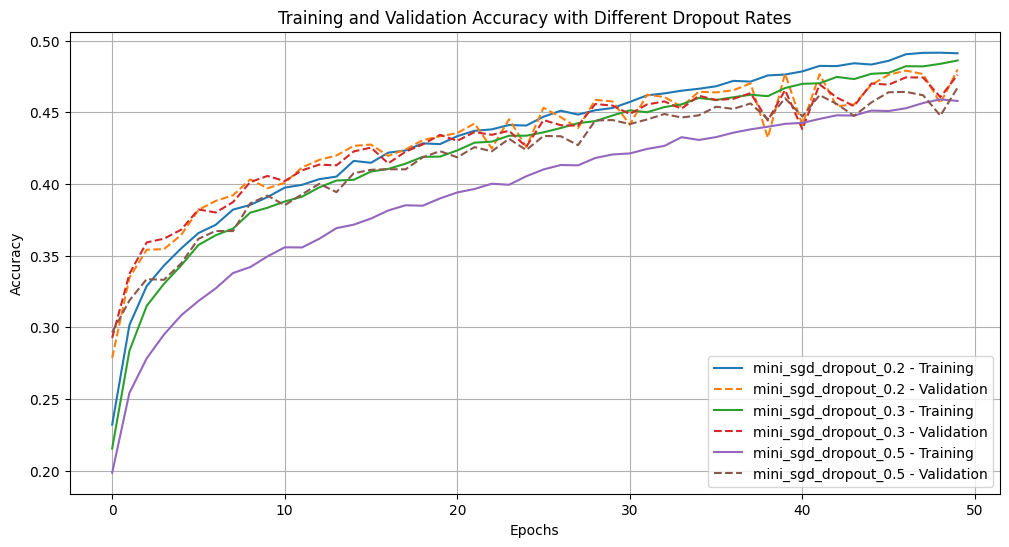

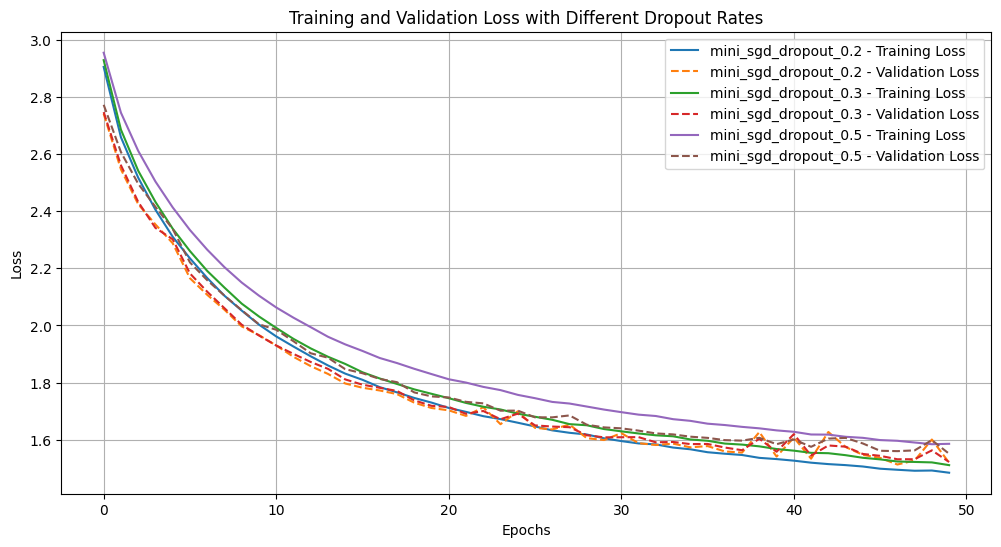

In [33]:
plt.figure(figsize=(12, 6))

for key, value in results.items():
    plt.plot(value['history'].history['accuracy'], label=f'{key} - Training')
    plt.plot(value['history'].history['val_accuracy'], label=f'{key} - Validation',linestyle='dashed')

plt.grid(True)
plt.title('Training and Validation Accuracy with Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for key, value in results.items():
    plt.plot(value['history'].history['loss'], label=f'{key} - Training Loss')
    plt.plot(value['history'].history['val_loss'], label=f'{key} - Validation Loss',linestyle='dashed')
plt.grid(True)
plt.title('Training and Validation Loss with Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can clearly see that  `Dropout 0.3 ` performed better when it comes to the observation of the variance between the training set and the validation set (`accuracy : 0.4890`, `val_accuracy: 0.4829`)
Where as `Dropout with rate 0.2` performed better in the training set ( `training set accuracy =0.4978 val_accuracy: 0.4780`)
both rates gave approximate results, At the end, we will go with `Rate =0.3`

### 07-Use the early stopping technique, and specify the epoch at which the training stopped.

In [18]:
import time
start_time = time.time()
mini_sgd_dropout=keras.Sequential([
        tf.keras.Input(shape=(3072,)),    
        Dense(128, activation='relu', name='hidden_layer_1'),
        Dense(64, activation='relu', name='hidden_layer_2',kernel_regularizer=keras.regularizers.l2(0.01)), 
        keras.layers.Dropout(0.3),
        Dense(10, activation='softmax', name='output_layer'),
    ])
mini_sgd_dropout.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        metrics=["accuracy"]
    )
# Define EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=30)
history_dropout = mini_sgd_dropout.fit(x_train, y_train, epochs=300, batch_size=128, callbacks=[callback],validation_data=(x_cv, y_cv))  
end_time = time.time()
    
timing['mini_sgd_dropout'] = end_time - start_time

Epoch 1/300
313/313 [==============================] - 4s 10ms/step - loss: 2.9630 - accuracy: 0.2140 - val_loss: 2.7918 - val_accuracy: 0.2984
Epoch 2/300
313/313 [==============================] - 3s 11ms/step - loss: 2.7218 - accuracy: 0.2772 - val_loss: 2.5916 - val_accuracy: 0.3395
Epoch 3/300
313/313 [==============================] - 3s 9ms/step - loss: 2.5767 - accuracy: 0.3047 - val_loss: 2.4696 - val_accuracy: 0.3516
Epoch 4/300
313/313 [==============================] - 3s 8ms/step - loss: 2.4600 - accuracy: 0.3258 - val_loss: 2.4017 - val_accuracy: 0.3438
Epoch 5/300
313/313 [==============================] - 2s 8ms/step - loss: 2.3715 - accuracy: 0.3351 - val_loss: 2.3410 - val_accuracy: 0.3503
Epoch 6/300
313/313 [==============================] - 3s 8ms/step - loss: 2.2931 - accuracy: 0.3433 - val_loss: 2.2045 - val_accuracy: 0.3756
Epoch 7/300
313/313 [==============================] - 2s 8ms/step - loss: 2.2191 - accuracy: 0.3530 - val_loss: 2.1434 - val_accuracy: 0.37

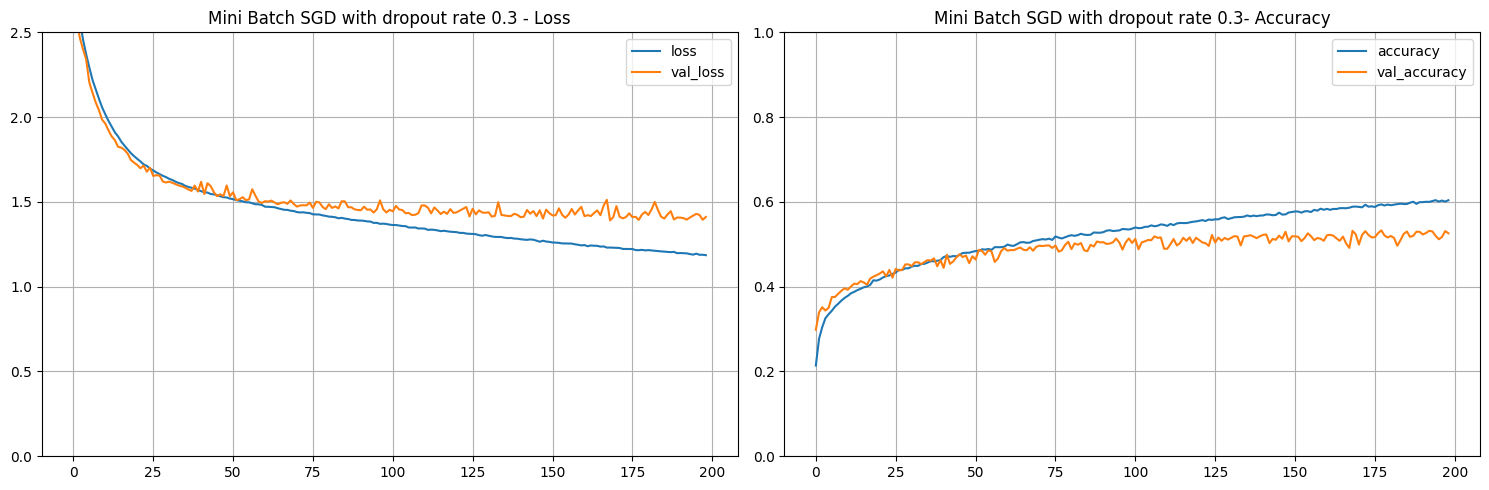

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(history_dropout.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.title('Mini Batch SGD with dropout rate 0.3 - Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(history_dropout.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title('Mini Batch SGD with dropout rate 0.3- Accuracy')

plt.tight_layout()  
plt.show()  

- Patience: how many epoch we wait to take the decision of stopping
- Verbose: if 1 than after stopping the function will print the information about when it stopped.
- mode: `min` the decision is made conserdiring the min value is better.


Epoch 199: early stopping
Training stopped at epoch: 198

### 08- Add a batch normalization layer after the first hidden layer, and train using mini-batch SGD. Present the results obtained. 

In [20]:
import time
start_time = time.time()
mini_sgd_dropout_bn=keras.Sequential([
        tf.keras.Input(shape=(3072,)),    
        Dense(128, activation='relu', name='hidden_layer_1'),
        # Add Batch Normalization
        keras.layers.BatchNormalization(),
        Dense(64, activation='relu', name='hidden_layer_2',kernel_regularizer=keras.regularizers.l2(0.01)), 
        keras.layers.Dropout(0.3),
        Dense(10, activation='softmax', name='output_layer'),
    ])
mini_sgd_dropout_bn.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        metrics=["accuracy"]
    )
callback = keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=30)
history_dropout_bn = mini_sgd_dropout_bn.fit(x_train, y_train, epochs=300, batch_size=128, callbacks=[callback],validation_data=(x_cv, y_cv))  
end_time = time.time()
    
timing['mini_sgd_dropout_bn'] = end_time - start_time

Epoch 1/300


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 5s 13ms/step - loss: 2.8146 - accuracy: 0.2819 - val_loss: 2.5879 - val_accuracy: 0.3468
Epoch 2/300
313/313 [==============================] - 4s 11ms/step - loss: 2.5374 - accuracy: 0.3517 - val_loss: 2.4366 - val_accuracy: 0.3677
Epoch 3/300
313/313 [==============================] - 3s 9ms/step - loss: 2.3931 - accuracy: 0.3780 - val_loss: 2.3446 - val_accuracy: 0.3817
Epoch 4/300
313/313 [==============================] - 3s 10ms/step - loss: 2.2800 - accuracy: 0.3934 - val_loss: 2.1980 - val_accuracy: 0.4035
Epoch 5/300
313/313 [==============================] - 3s 10ms/step - loss: 2.1838 - accuracy: 0.4049 - val_loss: 2.1295 - val_accuracy: 0.4131
Epoch 6/300
313/313 [==============================] - 3s 9ms/step - loss: 2.0993 - accuracy: 0.4178 - val_loss: 2.0687 - val_accuracy: 0.4100
Epoch 7/300
313/313 [==============================] - 4s 12ms/step - loss: 2.0318 - accuracy: 0.4225 - val_loss: 1.9871 - val_accuracy: 0.4292
Epoch 

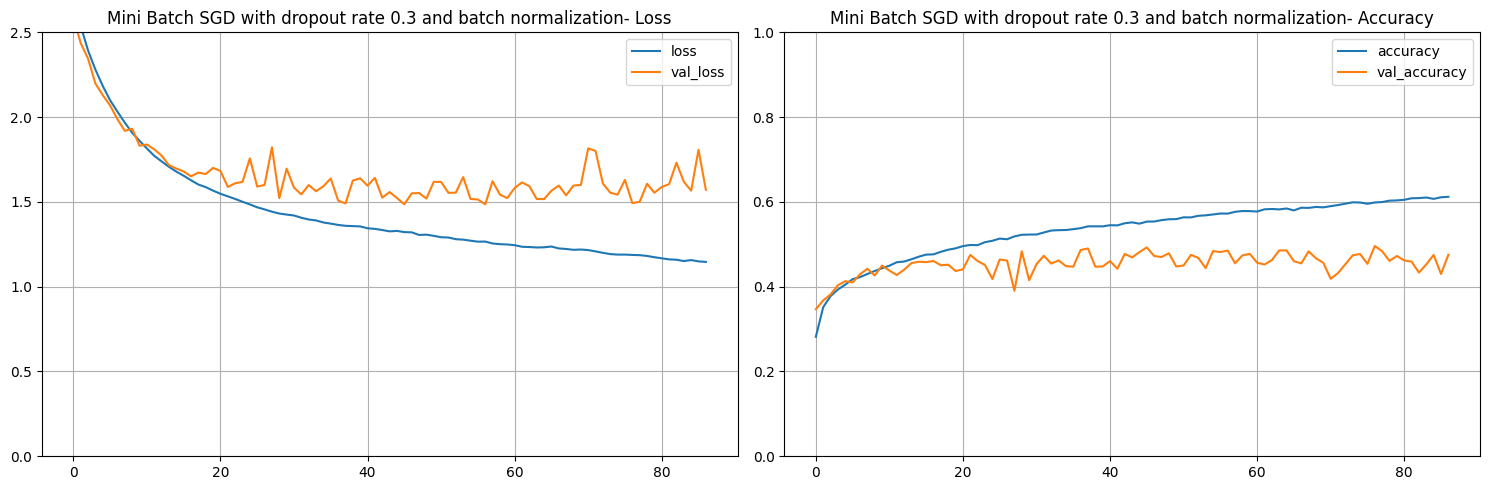

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(history_dropout_bn.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.title('Mini Batch SGD with dropout rate 0.3 and batch normalization- Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(history_dropout_bn.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title('Mini Batch SGD with dropout rate 0.3 and batch normalization- Accuracy')

plt.tight_layout()  
plt.show()  

Batch normalization improves neural network training by reducing internal covariate shift and accelerating convergence, leading to better performance.

Here, in our dataset ``we didn't see the best result`` (pretty much the same results with and without batch normaliztion)

### 09- Use random search to find the best hyperparameters for learning_rate, dropout_rate, and batch_size, and specify the parameters that ensure the best results.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

def build_model(learning_rate=0.01, dropout_rate=0.2):
    model = Sequential([
        keras.Input(shape=(3072,)),
        Dense(128, activation='relu', name='hidden_layer_1'),
        Dense(64, activation='relu', name='hidden_layer_2', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(dropout_rate),
        Dense(10, activation='softmax', name='output_layer'),
    ])
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["accuracy"]
    )
    return model

distributions = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128, 256]
}

clf = RandomizedSearchCV(KerasClassifier(build_model,learning_rate=0.001,dropout_rate=0.3), 
                         distributions, n_iter=10,cv=3,verbose=3,random_state=1)
search_model = clf.fit(x_train, y_train, epochs=50,  validation_data=(x_cv, y_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/50


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 6s 7ms/step - loss: 3.1143 - accuracy: 0.1608 - val_loss: 3.0167 - val_accuracy: 0.2232
Epoch 2/50
417/417 [==============================] - 2s 6ms/step - loss: 2.9951 - accuracy: 0.2106 - val_loss: 2.9274 - val_accuracy: 0.2497
Epoch 3/50
417/417 [==============================] - 3s 6ms/step - loss: 2.9275 - accuracy: 0.2343 - val_loss: 2.8654 - val_accuracy: 0.2738
Epoch 4/50
417/417 [==============================] - 3s 6ms/step - loss: 2.8710 - accuracy: 0.2505 - val_loss: 2.8141 - val_accuracy: 0.2928
Epoch 5/50
417/417 [==============================] - 3s 7ms/step - loss: 2.8274 - accuracy: 0.2690 - val_loss: 2.7759 - val_accuracy: 0.3040
Epoch 6/50
417/417 [==============================] - 3s 6ms/step - loss: 2.7903 - accuracy: 0.2729 - val_loss: 2.7384 - val_accuracy: 0.3152
Epoch 7/50
417/417 [==============================] - 2s 6ms/step - loss: 2.7570 - accuracy: 0.2866 - val_loss: 2.7060 - val_accuracy: 0.3266
Epoch 8/50
417/41

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 5s 9ms/step - loss: 3.1212 - accuracy: 0.1452 - val_loss: 3.0504 - val_accuracy: 0.2008
Epoch 2/50
417/417 [==============================] - 3s 8ms/step - loss: 3.0341 - accuracy: 0.1846 - val_loss: 2.9794 - val_accuracy: 0.2300
Epoch 3/50
417/417 [==============================] - 3s 7ms/step - loss: 2.9739 - accuracy: 0.2041 - val_loss: 2.9214 - val_accuracy: 0.2501
Epoch 4/50
417/417 [==============================] - 3s 8ms/step - loss: 2.9272 - accuracy: 0.2230 - val_loss: 2.8741 - val_accuracy: 0.2696
Epoch 5/50
417/417 [==============================] - 3s 7ms/step - loss: 2.8833 - accuracy: 0.2361 - val_loss: 2.8327 - val_accuracy: 0.2734
Epoch 6/50
417/417 [==============================] - 3s 7ms/step - loss: 2.8449 - accuracy: 0.2468 - val_loss: 2.7947 - val_accuracy: 0.2902
Epoch 7/50
417/417 [==============================] - 3s 8ms/step - loss: 2.8147 - accuracy: 0.2589 - val_loss: 2.7617 - val_accuracy: 0.2977
Epoch 8/50
417/41

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 5s 11ms/step - loss: 3.1193 - accuracy: 0.1533 - val_loss: 3.0268 - val_accuracy: 0.2253
Epoch 2/50
417/417 [==============================] - 3s 7ms/step - loss: 3.0038 - accuracy: 0.2072 - val_loss: 2.9443 - val_accuracy: 0.2578
Epoch 3/50
417/417 [==============================] - 3s 8ms/step - loss: 2.9390 - accuracy: 0.2275 - val_loss: 2.8851 - val_accuracy: 0.2769
Epoch 4/50
417/417 [==============================] - 3s 8ms/step - loss: 2.8914 - accuracy: 0.2438 - val_loss: 2.8371 - val_accuracy: 0.2859
Epoch 5/50
417/417 [==============================] - 3s 8ms/step - loss: 2.8499 - accuracy: 0.2534 - val_loss: 2.8019 - val_accuracy: 0.2923
Epoch 6/50
417/417 [==============================] - 3s 7ms/step - loss: 2.8148 - accuracy: 0.2658 - val_loss: 2.7626 - val_accuracy: 0.3082
Epoch 7/50
417/417 [==============================] - 3s 7ms/step - loss: 2.7835 - accuracy: 0.2719 - val_loss: 2.7310 - val_accuracy: 0.3168
Epoch 8/50
417/4

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 3s 12ms/step - loss: 2.6304 - accuracy: 0.1847 - val_loss: 2.2017 - val_accuracy: 0.2404
Epoch 2/50
209/209 [==============================] - 2s 9ms/step - loss: 2.1059 - accuracy: 0.2609 - val_loss: 2.1209 - val_accuracy: 0.2331
Epoch 3/50
209/209 [==============================] - 2s 10ms/step - loss: 1.9704 - accuracy: 0.3002 - val_loss: 1.8801 - val_accuracy: 0.3350
Epoch 4/50
209/209 [==============================] - 2s 9ms/step - loss: 1.8996 - accuracy: 0.3232 - val_loss: 2.0650 - val_accuracy: 0.2542
Epoch 5/50
209/209 [==============================] - 2s 10ms/step - loss: 1.8719 - accuracy: 0.3349 - val_loss: 1.9382 - val_accuracy: 0.2999
Epoch 6/50
209/209 [==============================] - 2s 9ms/step - loss: 1.8528 - accuracy: 0.3402 - val_loss: 2.0242 - val_accuracy: 0.2855
Epoch 7/50
209/209 [==============================] - 2s 9ms/step - loss: 1.8326 - accuracy: 0.3434 - val_loss: 1.8072 - val_accuracy: 0.3546
Epoch 8/50
209

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 4s 16ms/step - loss: 2.6407 - accuracy: 0.1542 - val_loss: 2.2690 - val_accuracy: 0.1867
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 2.1591 - accuracy: 0.2145 - val_loss: 2.2068 - val_accuracy: 0.2213
Epoch 3/50
209/209 [==============================] - 3s 12ms/step - loss: 2.0214 - accuracy: 0.2604 - val_loss: 1.9808 - val_accuracy: 0.2922
Epoch 4/50
209/209 [==============================] - 2s 9ms/step - loss: 1.9632 - accuracy: 0.2837 - val_loss: 1.9490 - val_accuracy: 0.2800
Epoch 5/50
209/209 [==============================] - 2s 11ms/step - loss: 1.9279 - accuracy: 0.3018 - val_loss: 1.8854 - val_accuracy: 0.3196
Epoch 6/50
209/209 [==============================] - 3s 12ms/step - loss: 1.8959 - accuracy: 0.3198 - val_loss: 1.9182 - val_accuracy: 0.2821
Epoch 7/50
209/209 [==============================] - 2s 10ms/step - loss: 1.8698 - accuracy: 0.3297 - val_loss: 1.9566 - val_accuracy: 0.2839
Epoch 8/50


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 3s 11ms/step - loss: 2.7151 - accuracy: 0.1745 - val_loss: 2.2948 - val_accuracy: 0.2004
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 2.1435 - accuracy: 0.2406 - val_loss: 1.9491 - val_accuracy: 0.2874
Epoch 3/50
209/209 [==============================] - 2s 9ms/step - loss: 2.0026 - accuracy: 0.2857 - val_loss: 2.2935 - val_accuracy: 0.2236
Epoch 4/50
209/209 [==============================] - 2s 10ms/step - loss: 1.9345 - accuracy: 0.3074 - val_loss: 1.9966 - val_accuracy: 0.2649
Epoch 5/50
209/209 [==============================] - 3s 12ms/step - loss: 1.8981 - accuracy: 0.3227 - val_loss: 1.8718 - val_accuracy: 0.3215
Epoch 6/50
209/209 [==============================] - 2s 12ms/step - loss: 1.8797 - accuracy: 0.3337 - val_loss: 1.8815 - val_accuracy: 0.3287
Epoch 7/50
209/209 [==============================] - 3s 14ms/step - loss: 1.8512 - accuracy: 0.3412 - val_loss: 1.8368 - val_accuracy: 0.3438
Epoch 8/50


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 2s 17ms/step - loss: 3.1890 - accuracy: 0.1077 - val_loss: 3.1356 - val_accuracy: 0.1130
Epoch 2/50
105/105 [==============================] - 2s 14ms/step - loss: 3.1241 - accuracy: 0.1339 - val_loss: 3.1038 - val_accuracy: 0.1664
Epoch 3/50
105/105 [==============================] - 2s 14ms/step - loss: 3.0991 - accuracy: 0.1575 - val_loss: 3.0805 - val_accuracy: 0.1966
Epoch 4/50
105/105 [==============================] - 1s 14ms/step - loss: 3.0787 - accuracy: 0.1769 - val_loss: 3.0609 - val_accuracy: 0.2156
Epoch 5/50
105/105 [==============================] - 2s 14ms/step - loss: 3.0623 - accuracy: 0.1900 - val_loss: 3.0422 - val_accuracy: 0.2211
Epoch 6/50
105/105 [==============================] - 1s 13ms/step - loss: 3.0426 - accuracy: 0.1999 - val_loss: 3.0223 - val_accuracy: 0.2309
Epoch 7/50
105/105 [==============================] - 1s 14ms/step - loss: 3.0258 - accuracy: 0.2017 - val_loss: 3.0028 - val_accuracy: 0.2419
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 21ms/step - loss: 3.1556 - accuracy: 0.1253 - val_loss: 3.0994 - val_accuracy: 0.1506
Epoch 2/50
105/105 [==============================] - 2s 15ms/step - loss: 3.0914 - accuracy: 0.1555 - val_loss: 3.0697 - val_accuracy: 0.1849
Epoch 3/50
105/105 [==============================] - 1s 13ms/step - loss: 3.0647 - accuracy: 0.1812 - val_loss: 3.0456 - val_accuracy: 0.2036
Epoch 4/50
105/105 [==============================] - 1s 13ms/step - loss: 3.0440 - accuracy: 0.1890 - val_loss: 3.0233 - val_accuracy: 0.2203
Epoch 5/50
105/105 [==============================] - 2s 17ms/step - loss: 3.0223 - accuracy: 0.2023 - val_loss: 3.0020 - val_accuracy: 0.2302
Epoch 6/50
105/105 [==============================] - 2s 15ms/step - loss: 3.0029 - accuracy: 0.2072 - val_loss: 2.9816 - val_accuracy: 0.2370
Epoch 7/50
105/105 [==============================] - 2s 15ms/step - loss: 2.9860 - accuracy: 0.2118 - val_loss: 2.9635 - val_accuracy: 0.2422
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 4s 28ms/step - loss: 3.1839 - accuracy: 0.1096 - val_loss: 3.1264 - val_accuracy: 0.1502
Epoch 2/50
105/105 [==============================] - 2s 22ms/step - loss: 3.1164 - accuracy: 0.1539 - val_loss: 3.0913 - val_accuracy: 0.1910
Epoch 3/50
105/105 [==============================] - 3s 25ms/step - loss: 3.0900 - accuracy: 0.1727 - val_loss: 3.0647 - val_accuracy: 0.2087
Epoch 4/50
105/105 [==============================] - 2s 22ms/step - loss: 3.0635 - accuracy: 0.1890 - val_loss: 3.0395 - val_accuracy: 0.2156
Epoch 5/50
105/105 [==============================] - 3s 26ms/step - loss: 3.0408 - accuracy: 0.1938 - val_loss: 3.0170 - val_accuracy: 0.2231
Epoch 6/50
105/105 [==============================] - 2s 22ms/step - loss: 3.0191 - accuracy: 0.2000 - val_loss: 2.9954 - val_accuracy: 0.2248
Epoch 7/50
105/105 [==============================] - 3s 26ms/step - loss: 2.9999 - accuracy: 0.2081 - val_loss: 2.9752 - val_accuracy: 0.2278
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 5s 9ms/step - loss: 2.4994 - accuracy: 0.1606 - val_loss: 2.1248 - val_accuracy: 0.1609
Epoch 2/50
417/417 [==============================] - 4s 10ms/step - loss: 2.0814 - accuracy: 0.2163 - val_loss: 2.0002 - val_accuracy: 0.2507
Epoch 3/50
417/417 [==============================] - 4s 10ms/step - loss: 2.0193 - accuracy: 0.2453 - val_loss: 1.9962 - val_accuracy: 0.2648
Epoch 4/50
417/417 [==============================] - 4s 10ms/step - loss: 1.9771 - accuracy: 0.2648 - val_loss: 1.9455 - val_accuracy: 0.2655
Epoch 5/50
417/417 [==============================] - 4s 10ms/step - loss: 1.9590 - accuracy: 0.2769 - val_loss: 1.9730 - val_accuracy: 0.2658
Epoch 6/50
417/417 [==============================] - 4s 10ms/step - loss: 1.9372 - accuracy: 0.2810 - val_loss: 1.9470 - val_accuracy: 0.2827
Epoch 7/50
417/417 [==============================] - 3s 8ms/step - loss: 1.9313 - accuracy: 0.2862 - val_loss: 1.8555 - val_accuracy: 0.3128
Epoch 8/50
4

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 5s 10ms/step - loss: 2.4767 - accuracy: 0.1508 - val_loss: 2.1882 - val_accuracy: 0.1549
Epoch 2/50
417/417 [==============================] - 3s 8ms/step - loss: 2.1050 - accuracy: 0.1988 - val_loss: 2.1675 - val_accuracy: 0.1687
Epoch 3/50
417/417 [==============================] - 3s 8ms/step - loss: 2.0377 - accuracy: 0.2330 - val_loss: 2.3043 - val_accuracy: 0.1978
Epoch 4/50
417/417 [==============================] - 3s 8ms/step - loss: 1.9981 - accuracy: 0.2551 - val_loss: 2.0279 - val_accuracy: 0.2484
Epoch 5/50
417/417 [==============================] - 3s 8ms/step - loss: 1.9714 - accuracy: 0.2629 - val_loss: 1.9187 - val_accuracy: 0.2820
Epoch 6/50
417/417 [==============================] - 4s 9ms/step - loss: 1.9571 - accuracy: 0.2667 - val_loss: 1.9227 - val_accuracy: 0.2663
Epoch 7/50
417/417 [==============================] - 3s 8ms/step - loss: 1.9446 - accuracy: 0.2714 - val_loss: 1.9121 - val_accuracy: 0.2801
Epoch 8/50
417/4

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 4s 8ms/step - loss: 2.4230 - accuracy: 0.1783 - val_loss: 2.0825 - val_accuracy: 0.2010
Epoch 2/50
417/417 [==============================] - 3s 7ms/step - loss: 2.0677 - accuracy: 0.2360 - val_loss: 2.0094 - val_accuracy: 0.2424
Epoch 3/50
417/417 [==============================] - 3s 7ms/step - loss: 2.0036 - accuracy: 0.2583 - val_loss: 2.0732 - val_accuracy: 0.2393
Epoch 4/50
417/417 [==============================] - 3s 8ms/step - loss: 1.9705 - accuracy: 0.2711 - val_loss: 2.0815 - val_accuracy: 0.2473
Epoch 5/50
417/417 [==============================] - 3s 7ms/step - loss: 1.9614 - accuracy: 0.2751 - val_loss: 1.8680 - val_accuracy: 0.3211
Epoch 6/50
417/417 [==============================] - 3s 7ms/step - loss: 1.9277 - accuracy: 0.2923 - val_loss: 1.8946 - val_accuracy: 0.2821
Epoch 7/50
417/417 [==============================] - 3s 7ms/step - loss: 1.9154 - accuracy: 0.3003 - val_loss: 1.8955 - val_accuracy: 0.3169
Epoch 8/50
417/41

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 4s 14ms/step - loss: 3.1599 - accuracy: 0.1311 - val_loss: 3.0866 - val_accuracy: 0.1934
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 3.0756 - accuracy: 0.1753 - val_loss: 3.0347 - val_accuracy: 0.2164
Epoch 3/50
209/209 [==============================] - 2s 11ms/step - loss: 3.0313 - accuracy: 0.1927 - val_loss: 2.9895 - val_accuracy: 0.2390
Epoch 4/50
209/209 [==============================] - 2s 11ms/step - loss: 2.9993 - accuracy: 0.2036 - val_loss: 2.9546 - val_accuracy: 0.2573
Epoch 5/50
209/209 [==============================] - 2s 10ms/step - loss: 2.9657 - accuracy: 0.2166 - val_loss: 2.9249 - val_accuracy: 0.2624
Epoch 6/50
209/209 [==============================] - 3s 12ms/step - loss: 2.9413 - accuracy: 0.2283 - val_loss: 2.8972 - val_accuracy: 0.2749
Epoch 7/50
209/209 [==============================] - 2s 10ms/step - loss: 2.9157 - accuracy: 0.2398 - val_loss: 2.8699 - val_accuracy: 0.2861
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 4s 15ms/step - loss: 3.1684 - accuracy: 0.1173 - val_loss: 3.1124 - val_accuracy: 0.1594
Epoch 2/50
209/209 [==============================] - 2s 11ms/step - loss: 3.1097 - accuracy: 0.1484 - val_loss: 3.0766 - val_accuracy: 0.2024
Epoch 3/50
209/209 [==============================] - 3s 13ms/step - loss: 3.0713 - accuracy: 0.1729 - val_loss: 3.0367 - val_accuracy: 0.2281
Epoch 4/50
209/209 [==============================] - 2s 11ms/step - loss: 3.0388 - accuracy: 0.1851 - val_loss: 3.0026 - val_accuracy: 0.2463
Epoch 5/50
209/209 [==============================] - 2s 11ms/step - loss: 3.0129 - accuracy: 0.1942 - val_loss: 2.9736 - val_accuracy: 0.2536
Epoch 6/50
209/209 [==============================] - 2s 12ms/step - loss: 2.9882 - accuracy: 0.2052 - val_loss: 2.9458 - val_accuracy: 0.2651
Epoch 7/50
209/209 [==============================] - 2s 11ms/step - loss: 2.9644 - accuracy: 0.2138 - val_loss: 2.9201 - val_accuracy: 0.2728
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 3s 12ms/step - loss: 3.1652 - accuracy: 0.1322 - val_loss: 3.0844 - val_accuracy: 0.1898
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 3.0746 - accuracy: 0.1765 - val_loss: 3.0320 - val_accuracy: 0.2219
Epoch 3/50
209/209 [==============================] - 2s 10ms/step - loss: 3.0358 - accuracy: 0.1918 - val_loss: 2.9920 - val_accuracy: 0.2416
Epoch 4/50
209/209 [==============================] - 2s 10ms/step - loss: 2.9980 - accuracy: 0.2094 - val_loss: 2.9544 - val_accuracy: 0.2568
Epoch 5/50
209/209 [==============================] - 2s 11ms/step - loss: 2.9694 - accuracy: 0.2179 - val_loss: 2.9216 - val_accuracy: 0.2627
Epoch 6/50
209/209 [==============================] - 2s 11ms/step - loss: 2.9398 - accuracy: 0.2255 - val_loss: 2.8910 - val_accuracy: 0.2740
Epoch 7/50
209/209 [==============================] - 2s 11ms/step - loss: 2.9154 - accuracy: 0.2335 - val_loss: 2.8651 - val_accuracy: 0.2825
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


834/834 [==============================] - 7s 7ms/step - loss: 2.3103 - accuracy: 0.2488 - val_loss: 2.0543 - val_accuracy: 0.2602
Epoch 2/50
834/834 [==============================] - 6s 7ms/step - loss: 1.9118 - accuracy: 0.3164 - val_loss: 1.9063 - val_accuracy: 0.3099
Epoch 3/50
834/834 [==============================] - 6s 7ms/step - loss: 1.8526 - accuracy: 0.3396 - val_loss: 1.8281 - val_accuracy: 0.3454
Epoch 4/50
834/834 [==============================] - 6s 8ms/step - loss: 1.8196 - accuracy: 0.3514 - val_loss: 1.8871 - val_accuracy: 0.3352
Epoch 5/50
834/834 [==============================] - 7s 9ms/step - loss: 1.7944 - accuracy: 0.3666 - val_loss: 2.2282 - val_accuracy: 0.2653
Epoch 6/50
834/834 [==============================] - 7s 8ms/step - loss: 1.7773 - accuracy: 0.3708 - val_loss: 1.8916 - val_accuracy: 0.3438
Epoch 7/50
834/834 [==============================] - 6s 7ms/step - loss: 1.7584 - accuracy: 0.3793 - val_loss: 1.9198 - val_accuracy: 0.3355
Epoch 8/50
834/83

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


834/834 [==============================] - 12s 14ms/step - loss: 2.2789 - accuracy: 0.2483 - val_loss: 1.9611 - val_accuracy: 0.2942
Epoch 2/50
834/834 [==============================] - 5s 7ms/step - loss: 1.8959 - accuracy: 0.3283 - val_loss: 1.9233 - val_accuracy: 0.2999
Epoch 3/50
834/834 [==============================] - 7s 8ms/step - loss: 1.8404 - accuracy: 0.3474 - val_loss: 1.8329 - val_accuracy: 0.3435
Epoch 4/50
834/834 [==============================] - 5s 7ms/step - loss: 1.7961 - accuracy: 0.3642 - val_loss: 1.8039 - val_accuracy: 0.3563
Epoch 5/50
834/834 [==============================] - 5s 6ms/step - loss: 1.7650 - accuracy: 0.3807 - val_loss: 1.8752 - val_accuracy: 0.3407
Epoch 6/50
834/834 [==============================] - 5s 6ms/step - loss: 1.7338 - accuracy: 0.3927 - val_loss: 1.8541 - val_accuracy: 0.3441
Epoch 7/50
834/834 [==============================] - 6s 7ms/step - loss: 1.7111 - accuracy: 0.4047 - val_loss: 1.6946 - val_accuracy: 0.3995
Epoch 8/50
834/

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


834/834 [==============================] - 7s 8ms/step - loss: 2.3175 - accuracy: 0.2382 - val_loss: 1.9884 - val_accuracy: 0.2942
Epoch 2/50
834/834 [==============================] - 5s 7ms/step - loss: 1.9075 - accuracy: 0.3128 - val_loss: 1.9323 - val_accuracy: 0.2913
Epoch 3/50
834/834 [==============================] - 7s 8ms/step - loss: 1.8490 - accuracy: 0.3409 - val_loss: 1.8499 - val_accuracy: 0.3285
Epoch 4/50
834/834 [==============================] - 6s 7ms/step - loss: 1.8122 - accuracy: 0.3568 - val_loss: 1.8248 - val_accuracy: 0.3509
Epoch 5/50
834/834 [==============================] - 6s 7ms/step - loss: 1.7867 - accuracy: 0.3670 - val_loss: 1.9020 - val_accuracy: 0.3321
Epoch 6/50
834/834 [==============================] - 7s 8ms/step - loss: 1.7611 - accuracy: 0.3760 - val_loss: 1.8213 - val_accuracy: 0.3333
Epoch 7/50
834/834 [==============================] - 6s 7ms/step - loss: 1.7402 - accuracy: 0.3883 - val_loss: 1.7413 - val_accuracy: 0.3925
Epoch 8/50
834/83

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 4s 8ms/step - loss: 2.8722 - accuracy: 0.2391 - val_loss: 2.6657 - val_accuracy: 0.3110
Epoch 2/50
417/417 [==============================] - 4s 9ms/step - loss: 2.5984 - accuracy: 0.3073 - val_loss: 2.4888 - val_accuracy: 0.3257
Epoch 3/50
417/417 [==============================] - 3s 8ms/step - loss: 2.4476 - accuracy: 0.3292 - val_loss: 2.3530 - val_accuracy: 0.3598
Epoch 4/50
417/417 [==============================] - 4s 9ms/step - loss: 2.3208 - accuracy: 0.3464 - val_loss: 2.2303 - val_accuracy: 0.3710
Epoch 5/50
417/417 [==============================] - 3s 7ms/step - loss: 2.2195 - accuracy: 0.3609 - val_loss: 2.1657 - val_accuracy: 0.3703
Epoch 6/50
417/417 [==============================] - 3s 7ms/step - loss: 2.1394 - accuracy: 0.3691 - val_loss: 2.0952 - val_accuracy: 0.3860
Epoch 7/50
417/417 [==============================] - 3s 7ms/step - loss: 2.0613 - accuracy: 0.3792 - val_loss: 2.0164 - val_accuracy: 0.3882
Epoch 8/50
417/41

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 4s 8ms/step - loss: 2.8851 - accuracy: 0.2292 - val_loss: 2.6942 - val_accuracy: 0.3104
Epoch 2/50
417/417 [==============================] - 3s 8ms/step - loss: 2.6114 - accuracy: 0.3069 - val_loss: 2.4978 - val_accuracy: 0.3392
Epoch 3/50
417/417 [==============================] - 3s 8ms/step - loss: 2.4490 - accuracy: 0.3329 - val_loss: 2.3555 - val_accuracy: 0.3537
Epoch 4/50
417/417 [==============================] - 3s 7ms/step - loss: 2.3203 - accuracy: 0.3501 - val_loss: 2.2436 - val_accuracy: 0.3585
Epoch 5/50
417/417 [==============================] - 3s 8ms/step - loss: 2.2155 - accuracy: 0.3632 - val_loss: 2.1344 - val_accuracy: 0.3783
Epoch 6/50
417/417 [==============================] - 3s 7ms/step - loss: 2.1288 - accuracy: 0.3778 - val_loss: 2.0684 - val_accuracy: 0.3866
Epoch 7/50
417/417 [==============================] - 3s 8ms/step - loss: 2.0536 - accuracy: 0.3869 - val_loss: 2.0037 - val_accuracy: 0.3917
Epoch 8/50
417/41

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


417/417 [==============================] - 5s 9ms/step - loss: 2.8712 - accuracy: 0.2368 - val_loss: 2.6699 - val_accuracy: 0.3177
Epoch 2/50
417/417 [==============================] - 3s 8ms/step - loss: 2.5997 - accuracy: 0.3056 - val_loss: 2.4773 - val_accuracy: 0.3467
Epoch 3/50
417/417 [==============================] - 3s 7ms/step - loss: 2.4464 - accuracy: 0.3341 - val_loss: 2.3894 - val_accuracy: 0.3458
Epoch 4/50
417/417 [==============================] - 3s 7ms/step - loss: 2.3192 - accuracy: 0.3452 - val_loss: 2.2969 - val_accuracy: 0.3419
Epoch 5/50
417/417 [==============================] - 3s 7ms/step - loss: 2.2196 - accuracy: 0.3573 - val_loss: 2.1411 - val_accuracy: 0.3787
Epoch 6/50
417/417 [==============================] - 3s 8ms/step - loss: 2.1322 - accuracy: 0.3685 - val_loss: 2.0804 - val_accuracy: 0.3802
Epoch 7/50
417/417 [==============================] - 4s 9ms/step - loss: 2.0615 - accuracy: 0.3768 - val_loss: 2.0097 - val_accuracy: 0.3898
Epoch 8/50
417/41

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 19ms/step - loss: 2.8988 - accuracy: 0.1744 - val_loss: 2.7030 - val_accuracy: 0.2059
Epoch 2/50
105/105 [==============================] - 2s 15ms/step - loss: 2.5081 - accuracy: 0.2510 - val_loss: 2.4129 - val_accuracy: 0.2471
Epoch 3/50
105/105 [==============================] - 2s 16ms/step - loss: 2.2793 - accuracy: 0.2868 - val_loss: 2.1547 - val_accuracy: 0.3134
Epoch 4/50
105/105 [==============================] - 2s 15ms/step - loss: 2.1266 - accuracy: 0.3101 - val_loss: 2.0615 - val_accuracy: 0.2956
Epoch 5/50
105/105 [==============================] - 2s 15ms/step - loss: 2.0206 - accuracy: 0.3304 - val_loss: 2.0307 - val_accuracy: 0.3025
Epoch 6/50
105/105 [==============================] - 2s 14ms/step - loss: 1.9604 - accuracy: 0.3361 - val_loss: 1.9594 - val_accuracy: 0.3280
Epoch 7/50
105/105 [==============================] - 2s 16ms/step - loss: 1.8972 - accuracy: 0.3544 - val_loss: 1.8380 - val_accuracy: 0.3549
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 18ms/step - loss: 2.9069 - accuracy: 0.1732 - val_loss: 2.6368 - val_accuracy: 0.2348
Epoch 2/50
105/105 [==============================] - 2s 20ms/step - loss: 2.5179 - accuracy: 0.2473 - val_loss: 2.4217 - val_accuracy: 0.2495
Epoch 3/50
105/105 [==============================] - 2s 18ms/step - loss: 2.2757 - accuracy: 0.2871 - val_loss: 2.2134 - val_accuracy: 0.2931
Epoch 4/50
105/105 [==============================] - 2s 15ms/step - loss: 2.1279 - accuracy: 0.3096 - val_loss: 2.4440 - val_accuracy: 0.2155
Epoch 5/50
105/105 [==============================] - 1s 14ms/step - loss: 2.0343 - accuracy: 0.3273 - val_loss: 1.9413 - val_accuracy: 0.3360
Epoch 6/50
105/105 [==============================] - 2s 14ms/step - loss: 1.9588 - accuracy: 0.3378 - val_loss: 1.9587 - val_accuracy: 0.2990
Epoch 7/50
105/105 [==============================] - 2s 15ms/step - loss: 1.9091 - accuracy: 0.3458 - val_loss: 2.0003 - val_accuracy: 0.3089
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 24ms/step - loss: 2.9211 - accuracy: 0.1659 - val_loss: 2.7616 - val_accuracy: 0.1779
Epoch 2/50
105/105 [==============================] - 2s 17ms/step - loss: 2.5148 - accuracy: 0.2510 - val_loss: 2.3451 - val_accuracy: 0.2651
Epoch 3/50
105/105 [==============================] - 2s 14ms/step - loss: 2.2825 - accuracy: 0.2831 - val_loss: 2.2519 - val_accuracy: 0.2714
Epoch 4/50
105/105 [==============================] - 2s 18ms/step - loss: 2.1305 - accuracy: 0.3052 - val_loss: 2.2094 - val_accuracy: 0.2711
Epoch 5/50
105/105 [==============================] - 2s 17ms/step - loss: 2.0292 - accuracy: 0.3298 - val_loss: 2.0393 - val_accuracy: 0.3065
Epoch 6/50
105/105 [==============================] - 2s 15ms/step - loss: 1.9525 - accuracy: 0.3388 - val_loss: 1.9502 - val_accuracy: 0.3226
Epoch 7/50
105/105 [==============================] - 2s 15ms/step - loss: 1.9139 - accuracy: 0.3472 - val_loss: 1.8575 - val_accuracy: 0.3644
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 4s 14ms/step - loss: 2.9705 - accuracy: 0.2016 - val_loss: 2.8209 - val_accuracy: 0.2746
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 2.7743 - accuracy: 0.2660 - val_loss: 2.6604 - val_accuracy: 0.3164
Epoch 3/50
209/209 [==============================] - 2s 10ms/step - loss: 2.6514 - accuracy: 0.2964 - val_loss: 2.5626 - val_accuracy: 0.3336
Epoch 4/50
209/209 [==============================] - 2s 10ms/step - loss: 2.5601 - accuracy: 0.3116 - val_loss: 2.4737 - val_accuracy: 0.3387
Epoch 5/50
209/209 [==============================] - 2s 10ms/step - loss: 2.4819 - accuracy: 0.3274 - val_loss: 2.4056 - val_accuracy: 0.3546
Epoch 6/50
209/209 [==============================] - 3s 13ms/step - loss: 2.4125 - accuracy: 0.3383 - val_loss: 2.3540 - val_accuracy: 0.3628
Epoch 7/50
209/209 [==============================] - 3s 12ms/step - loss: 2.3483 - accuracy: 0.3460 - val_loss: 2.2821 - val_accuracy: 0.3697
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 4s 12ms/step - loss: 2.9917 - accuracy: 0.2022 - val_loss: 2.8319 - val_accuracy: 0.2833
Epoch 2/50
209/209 [==============================] - 2s 12ms/step - loss: 2.7808 - accuracy: 0.2725 - val_loss: 2.6867 - val_accuracy: 0.3067
Epoch 3/50
209/209 [==============================] - 3s 12ms/step - loss: 2.6560 - accuracy: 0.2992 - val_loss: 2.5619 - val_accuracy: 0.3301
Epoch 4/50
209/209 [==============================] - 2s 10ms/step - loss: 2.5606 - accuracy: 0.3144 - val_loss: 2.4935 - val_accuracy: 0.3293
Epoch 5/50
209/209 [==============================] - 2s 10ms/step - loss: 2.4860 - accuracy: 0.3273 - val_loss: 2.4056 - val_accuracy: 0.3466
Epoch 6/50
209/209 [==============================] - 2s 10ms/step - loss: 2.4180 - accuracy: 0.3346 - val_loss: 2.3545 - val_accuracy: 0.3549
Epoch 7/50
209/209 [==============================] - 2s 10ms/step - loss: 2.3536 - accuracy: 0.3471 - val_loss: 2.3143 - val_accuracy: 0.3469
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 3s 12ms/step - loss: 2.9897 - accuracy: 0.2028 - val_loss: 2.8374 - val_accuracy: 0.2721
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 2.7812 - accuracy: 0.2623 - val_loss: 2.6690 - val_accuracy: 0.3097
Epoch 3/50
209/209 [==============================] - 2s 9ms/step - loss: 2.6615 - accuracy: 0.2902 - val_loss: 2.5866 - val_accuracy: 0.3289
Epoch 4/50
209/209 [==============================] - 2s 9ms/step - loss: 2.5691 - accuracy: 0.3113 - val_loss: 2.5064 - val_accuracy: 0.3372
Epoch 5/50
209/209 [==============================] - 2s 10ms/step - loss: 2.4864 - accuracy: 0.3249 - val_loss: 2.4201 - val_accuracy: 0.3532
Epoch 6/50
209/209 [==============================] - 2s 9ms/step - loss: 2.4207 - accuracy: 0.3342 - val_loss: 2.3550 - val_accuracy: 0.3547
Epoch 7/50
209/209 [==============================] - 2s 9ms/step - loss: 2.3571 - accuracy: 0.3434 - val_loss: 2.2883 - val_accuracy: 0.3665
Epoch 8/50
209

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 19ms/step - loss: 2.8653 - accuracy: 0.2021 - val_loss: 2.6153 - val_accuracy: 0.2500
Epoch 2/50
105/105 [==============================] - 2s 14ms/step - loss: 2.4409 - accuracy: 0.2871 - val_loss: 2.3008 - val_accuracy: 0.3114
Epoch 3/50
105/105 [==============================] - 2s 15ms/step - loss: 2.2149 - accuracy: 0.3165 - val_loss: 2.1233 - val_accuracy: 0.3348
Epoch 4/50
105/105 [==============================] - 1s 14ms/step - loss: 2.0572 - accuracy: 0.3393 - val_loss: 2.0663 - val_accuracy: 0.3112
Epoch 5/50
105/105 [==============================] - 2s 15ms/step - loss: 1.9598 - accuracy: 0.3517 - val_loss: 1.9794 - val_accuracy: 0.3321
Epoch 6/50
105/105 [==============================] - 1s 14ms/step - loss: 1.8866 - accuracy: 0.3655 - val_loss: 2.0224 - val_accuracy: 0.3260
Epoch 7/50
105/105 [==============================] - 1s 14ms/step - loss: 1.8379 - accuracy: 0.3750 - val_loss: 1.8338 - val_accuracy: 0.3713
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 24ms/step - loss: 2.8683 - accuracy: 0.1933 - val_loss: 2.5877 - val_accuracy: 0.2439
Epoch 2/50
105/105 [==============================] - 2s 18ms/step - loss: 2.4403 - accuracy: 0.2797 - val_loss: 2.4644 - val_accuracy: 0.2748
Epoch 3/50
105/105 [==============================] - 1s 13ms/step - loss: 2.2074 - accuracy: 0.3165 - val_loss: 2.1206 - val_accuracy: 0.3227
Epoch 4/50
105/105 [==============================] - 2s 17ms/step - loss: 2.0541 - accuracy: 0.3395 - val_loss: 2.4223 - val_accuracy: 0.1957
Epoch 5/50
105/105 [==============================] - 2s 18ms/step - loss: 1.9652 - accuracy: 0.3526 - val_loss: 1.9234 - val_accuracy: 0.3515
Epoch 6/50
105/105 [==============================] - 1s 13ms/step - loss: 1.8850 - accuracy: 0.3637 - val_loss: 1.9489 - val_accuracy: 0.3312
Epoch 7/50
105/105 [==============================] - 2s 15ms/step - loss: 1.8341 - accuracy: 0.3737 - val_loss: 1.9858 - val_accuracy: 0.3159
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 3s 23ms/step - loss: 2.8419 - accuracy: 0.1932 - val_loss: 2.5942 - val_accuracy: 0.2638
Epoch 2/50
105/105 [==============================] - 2s 15ms/step - loss: 2.4415 - accuracy: 0.2767 - val_loss: 2.3432 - val_accuracy: 0.2762
Epoch 3/50
105/105 [==============================] - 1s 14ms/step - loss: 2.2133 - accuracy: 0.3118 - val_loss: 2.3630 - val_accuracy: 0.2527
Epoch 4/50
105/105 [==============================] - 2s 16ms/step - loss: 2.0635 - accuracy: 0.3371 - val_loss: 2.1070 - val_accuracy: 0.3077
Epoch 5/50
105/105 [==============================] - 1s 14ms/step - loss: 1.9546 - accuracy: 0.3531 - val_loss: 2.1610 - val_accuracy: 0.2897
Epoch 6/50
105/105 [==============================] - 2s 15ms/step - loss: 1.8959 - accuracy: 0.3591 - val_loss: 1.9418 - val_accuracy: 0.3208
Epoch 7/50
105/105 [==============================] - 1s 14ms/step - loss: 1.8446 - accuracy: 0.3739 - val_loss: 1.9754 - val_accuracy: 0.3160
Epoch 8/50

/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 [==============================] - 5s 7ms/step - loss: 2.8226 - accuracy: 0.2504 - val_loss: 2.5694 - val_accuracy: 0.3338
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 2.4906 - accuracy: 0.3221 - val_loss: 2.3457 - val_accuracy: 0.3586
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 2.2970 - accuracy: 0.3520 - val_loss: 2.1881 - val_accuracy: 0.3786
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 2.1636 - accuracy: 0.3652 - val_loss: 2.0904 - val_accuracy: 0.3797
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 2.0559 - accuracy: 0.3767 - val_loss: 2.0163 - val_accuracy: 0.3893
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 1.9718 - accuracy: 0.3864 - val_loss: 1.9053 - val_accuracy: 0.3987
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 1.9021 - accuracy: 0.3977 - val_loss: 1.8446 - val_accuracy: 0.4104
Epoch 8/50
625/62

In [23]:
print('Best Parameters: ', search_model.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'dropout_rate': 0.2, 'batch_size': 64}


After training our models we found that these are the best Hyperparameters:
- `learning_rate`: 0.01
- `dropout_rate`: 0.2 
- `batch_size`: 64

In [25]:
import time
start_time=time.time()

callback = keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=30)

best_model = search_model.best_estimator_

best_model_history = best_model.fit(x_train, y_train, epochs=300, batch_size=best_model.batch_size,callbacks=[callback], validation_data=(x_cv, y_cv))

end_time=time.time()
timing['rs_bestmodel']=end_time-start_time



Epoch 1/300


/home/chaima/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


625/625 [==============================] - 7s 10ms/step - loss: 2.8031 - accuracy: 0.2481 - val_loss: 2.5845 - val_accuracy: 0.3217
Epoch 2/300
625/625 [==============================] - 7s 11ms/step - loss: 2.4770 - accuracy: 0.3248 - val_loss: 2.3238 - val_accuracy: 0.3682
Epoch 3/300
625/625 [==============================] - 9s 14ms/step - loss: 2.2843 - accuracy: 0.3534 - val_loss: 2.1714 - val_accuracy: 0.3861
Epoch 4/300
625/625 [==============================] - 8s 13ms/step - loss: 2.1458 - accuracy: 0.3737 - val_loss: 2.0746 - val_accuracy: 0.3867
Epoch 5/300
625/625 [==============================] - 8s 13ms/step - loss: 2.0391 - accuracy: 0.3823 - val_loss: 2.0130 - val_accuracy: 0.3924
Epoch 6/300
625/625 [==============================] - 8s 13ms/step - loss: 1.9544 - accuracy: 0.3936 - val_loss: 1.8842 - val_accuracy: 0.4112
Epoch 7/300
625/625 [==============================] - 7s 12ms/step - loss: 1.8840 - accuracy: 0.4073 - val_loss: 1.8339 - val_accuracy: 0.4127
Epoc

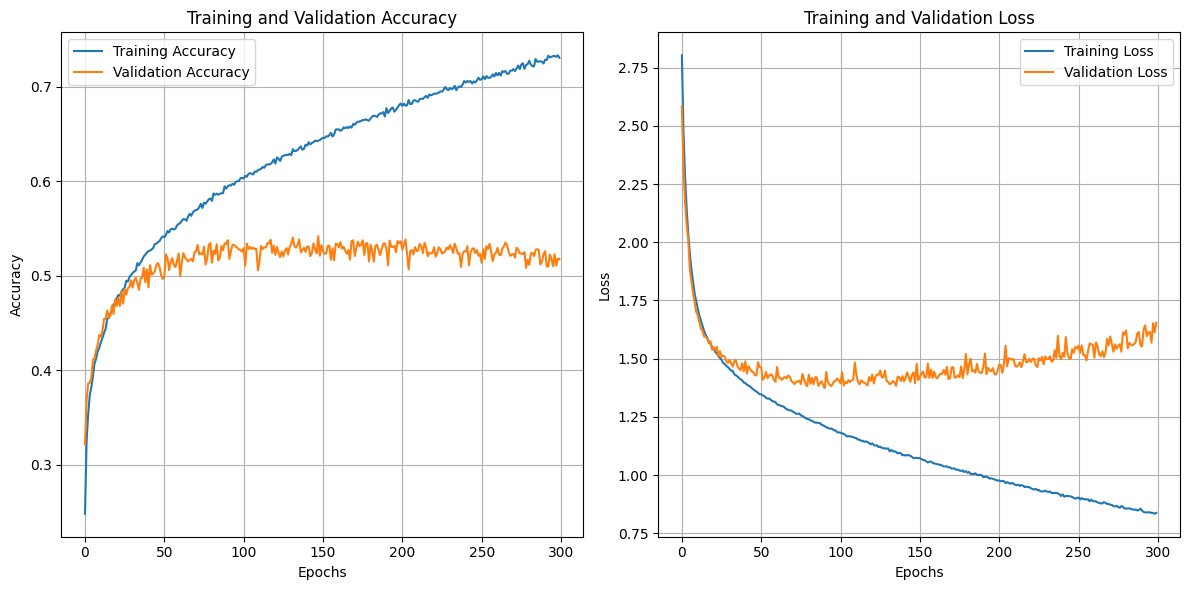

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(best_model_history.history_['accuracy'], label='Training Accuracy')
plt.plot(best_model_history.history_['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_model_history.history_['loss'], label='Training Loss')
plt.plot(best_model_history.history_['val_loss'], label='Validation Loss')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
timing

{'mini_sgd_model': 121.27564215660095,
 'mini_sgd_l2_model': 114.11082530021667,
 'mini_sgd_dropout': 575.1983017921448,
 'mini_sgd_dropout_bn': 325.98020815849304,
 'rs_bestmodel': 1288.317631483078}

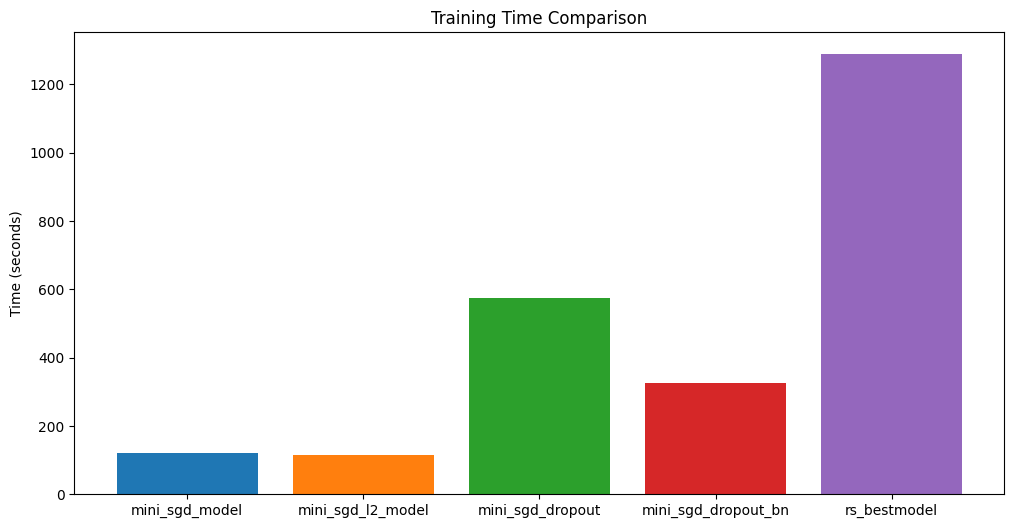

In [40]:
# Plotting timing
plt.figure(figsize=(12, 6))

for model_name in timing:
    plt.bar(model_name, timing.__getitem__(model_name))

plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.show()

#### Conclusion
*In machine leaning especialy in deep leaning there are alot of hyperparameters to explore they almost endless, that is a resuLt of tuning and tweaking the models to give suitable resluts. But, not every technique is a must to use, we have to understand the problem that we are stuck in and try to apply the needed technique.*